In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read file
df = pd.read_csv('thyroid.csv')

In [3]:
#check shape
df.shape

(9172, 30)

In [4]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,y
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,0
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,0
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,0
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,0
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,1



What percentage of instances in this data frame has value 1 in the column ``y``? 

In [5]:
df['y'].value_counts(normalize=True) * 100

0    73.822503
1    26.177497
Name: y, dtype: float64

In [6]:
#Check Male and Female Percentage
df['sex'].value_counts(normalize=True) * 100

F    66.212386
M    30.440471
?     3.347143
Name: sex, dtype: float64


What is the average age of all patients in this data frame? 

In [7]:
import numpy as np
np.mean(df['age'])

73.55582206716092

How many unique values are in the column referral source?

In [8]:
df['referral source'].nunique()

6

Which class in the column referral source has the highest frequency?

In [9]:
df['referral source'].mode()

0    other
dtype: object


Now, I will replace all the sentinel values with np.nan. 
What percentage of all cells is marked with np.nan?

In [10]:
df= df.replace('?', np.nan )

In [11]:
df.isnull().sum().sum()/ df.size *100

5.316543102195086

What percentage of the rows in this data frame have at least one attribute flagged as a missing value.

In [12]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])/len(df)*100

99.78194505015264

In [13]:
#check nulls avarage 
df.isna().sum().sum()/len(df)

1.594962930658526

In [14]:
#Replace null values in SEX columns with most frequent
df['sex'].mode()

0    F
dtype: object

In [15]:
df['sex'] = df['sex'].replace(np.nan, 'F')

In [16]:
df['sex'].isnull().sum()

0

In [17]:
df['sex'] = df['sex'].replace('F', 1)
df['sex'] = df['sex'].replace('M', 0)

In [18]:
df['sex'].mean()

0.6955952900130833

In [19]:
#13

In [20]:
df['query on thyroxine'].unique()

array(['f', 't'], dtype=object)

In [21]:
df= df.drop( ['query on thyroxine','on thyroxine'], axis=1)

In [22]:
df.shape

(9172, 28)

Apply a proper data transformation on the columns to transform them into numerical columns. Then use a correlation function np.corrcoef to find the linear correlation coefficient of these two columns.

In [23]:
df['sick'].value_counts()

f    8828
t     344
Name: sick, dtype: int64

In [24]:
df['sick'] = df['sick'].replace('f', 1)
df['sick'] = df['sick'].replace('t', 0)
df['sick'].max()

1

In [25]:
df['sick'].value_counts()

1    8828
0     344
Name: sick, dtype: int64

In [26]:
df['on antithyroid medication'].value_counts()

f    9056
t     116
Name: on antithyroid medication, dtype: int64

In [27]:
df['on antithyroid medication'] = df['on antithyroid medication'].replace('f', 1)
df['on antithyroid medication'] = df['on antithyroid medication'].replace('t', 0)

In [28]:
x=df['on antithyroid medication'] 
y=df['sick']
np.corrcoef(x,y)

array([[ 1.        , -0.02234132],
       [-0.02234132,  1.        ]])

Continue Transforrming columns into numbers based on most frequent

In [29]:
#16
df['I131 treatment'].value_counts()

f    9003
t     169
Name: I131 treatment, dtype: int64

In [30]:
df['I131 treatment'] = df['I131 treatment'].replace('f', 1)
df['I131 treatment'] = df['I131 treatment'].replace('t', 0)

In [31]:
df['thyroid surgery'].value_counts()

f    9038
t     134
Name: thyroid surgery, dtype: int64

In [32]:
df['thyroid surgery'] = df['thyroid surgery'].replace('f', 1)
df['thyroid surgery'] = df['thyroid surgery'].replace('t', 0)

In [33]:
df['pregnant'].value_counts()

f    9065
t     107
Name: pregnant, dtype: int64

In [34]:
df['pregnant'] = df['pregnant'].replace('f', 1)
df['pregnant'] = df['pregnant'].replace('t', 0)

In [35]:
df['query hypothyroid'].value_counts()


f    8542
t     630
Name: query hypothyroid, dtype: int64

In [36]:
df['query hypothyroid'] = df['query hypothyroid'].replace('f', 1)
df['query hypothyroid'] = df['query hypothyroid'].replace('t', 0)

In [37]:
df['query hyperthyroid'].value_counts()

f    8521
t     651
Name: query hyperthyroid, dtype: int64

In [38]:
df['query hyperthyroid'] = df['query hyperthyroid'].replace('f', 1)
df['query hyperthyroid'] = df['query hyperthyroid'].replace('t', 0)

In [39]:
print(df['lithium'].value_counts())
df['lithium'] = df['lithium'].replace('f', 1)
df['lithium'] = df['lithium'].replace('t', 0)

f    9079
t      93
Name: lithium, dtype: int64


In [40]:
df['goitre'].value_counts()

f    9088
t      84
Name: goitre, dtype: int64

In [41]:
df['goitre'] = df['goitre'].replace('f', 1)
df['goitre'] = df['goitre'].replace('t', 0)

In [42]:
df['tumor'].value_counts()

f    8931
t     241
Name: tumor, dtype: int64

In [43]:
df['tumor'] = df['tumor'].replace('f', 1)
df['tumor'] = df['tumor'].replace('t', 0)

In [44]:
df['hypopituitary'].value_counts()

f    9170
t       2
Name: hypopituitary, dtype: int64

In [45]:
df = df.drop( ['hypopituitary'], axis=1)

In [46]:
df['psych'].value_counts()

f    8754
t     418
Name: psych, dtype: int64

In [47]:
df['psych'] = df['psych'].replace('f', 1)
df['psych'] = df['psych'].replace('t', 0)

In [48]:
df['TSH measured'].value_counts()

t    8330
f     842
Name: TSH measured, dtype: int64

In [49]:
df['TSH measured'] = df['TSH measured'].replace('t', 1)
df['TSH measured'] = df['TSH measured'].replace('f', 0)

In [50]:
df['TSH']= df['TSH'].replace(np.nan,0)

In [51]:
df['TSH'].isnull().sum().sum()

0

In [52]:
df['TSH']= pd.to_numeric(df['TSH'])

In [53]:
df['TSH'].mean()

4.739347463911906

In [54]:
#check how many objects still in the dataframe
df1=df.select_dtypes(include=['object'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   T3 measured      9172 non-null   object
 1   T3               6568 non-null   object
 2   TT4 measured     9172 non-null   object
 3   TT4              8730 non-null   object
 4   T4U measured     9172 non-null   object
 5   T4U              8363 non-null   object
 6   FTI measured     9172 non-null   object
 7   FTI              8370 non-null   object
 8   TBG measured     9172 non-null   object
 9   TBG              349 non-null    object
 10  referral source  9172 non-null   object
dtypes: object(11)
memory usage: 788.3+ KB


#### Continue working on transformming data into numeric based on the most frequent

In [55]:
#1 and #2

In [56]:
df['TT4 measured'].value_counts()

t    8730
f     442
Name: TT4 measured, dtype: int64

In [57]:
df['TT4 measured'] = df['TT4 measured'].replace('t', 1)
df['TT4 measured'] = df['TT4 measured'].replace('f', 0)

In [58]:
df['TT4'].isnull().sum()

442

In [59]:
df['TT4']= df['TT4'].replace(np.nan, 0)
df['TT4'].isnull().sum().sum()

0

In [60]:
df['TT4']= pd.to_numeric(df['TT4'])

In [61]:
#2
df['TT4'].mean()

103.46202136938508

In [62]:
#3

In [63]:
df['T3 measured'].value_counts()

t    6568
f    2604
Name: T3 measured, dtype: int64

In [64]:
df['T3 measured'] = df['T3 measured'].replace('t', 1)
df['T3 measured'] = df['T3 measured'].replace('f', 0)

In [65]:
df['T3'].isnull().sum()

2604

In [66]:
#4

In [67]:
df['T3']= pd.to_numeric(df['T3'])

In [68]:
df['T3']= df['T3'].replace(np.nan, 0)

In [69]:
df['T3'].mean()

1.4111524199738334

In [70]:
#5

In [71]:
df['T4U measured'].value_counts()

t    8363
f     809
Name: T4U measured, dtype: int64

In [72]:
df['T4U measured'] = df['T4U measured'].replace('t', 1)
df['T4U measured'] = df['T4U measured'].replace('f', 0)

In [73]:
df['T4U']= df['T4U'].replace(np.nan, 0)

In [74]:
df['T4U']= pd.to_numeric(df['T4U'])

In [75]:
#6

In [76]:
df['T4U'].mean()

0.8899644570431747

In [77]:
#7

In [78]:
df['FTI measured'].value_counts()

t    8370
f     802
Name: FTI measured, dtype: int64

In [79]:
df['FTI measured'] = df['FTI measured'].replace('t', 1)
df['FTI measured'] = df['FTI measured'].replace('f', 0)

In [80]:
df['FTI']= df['FTI'].replace(np.nan, 0)

In [81]:
df['FTI']= pd.to_numeric(df['FTI'])

In [82]:
#8

In [83]:
df['FTI'].mean()

103.70399476635413

In [84]:
#9

In [85]:
df['TBG measured'].value_counts()

f    8823
t     349
Name: TBG measured, dtype: int64

In [86]:
df['TBG measured'] = df['TBG measured'].replace('f', 1)
df['TBG measured'] = df['TBG measured'].replace('t', 0)

In [87]:
#10

In [88]:
df['TBG']= df['TBG'].replace(np.nan, 0)
df['TBG']= pd.to_numeric(df['TBG'])
df['TBG'].mean()

1.136573266027039

In [89]:
#11

In [90]:
freq = df['referral source'].value_counts()
freq

other    5493
SVI      2394
SVHC      956
STMW      255
SVHD       71
WEST        3
Name: referral source, dtype: int64

#### 'referral source' has 6 classes, so we need to use One hot vector method to transfer it into numerical data

In [91]:
type_dummies= pd.get_dummies(df['referral source'], columns=['referral source'])
df = pd.concat([df,type_dummies],axis=1)

In [92]:
df = df.drop(['referral source'], axis=1)

In [93]:
#Now we don't have any objects in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   int64  
 2   on antithyroid medication  9172 non-null   int64  
 3   sick                       9172 non-null   int64  
 4   pregnant                   9172 non-null   int64  
 5   thyroid surgery            9172 non-null   int64  
 6   I131 treatment             9172 non-null   int64  
 7   query hypothyroid          9172 non-null   int64  
 8   query hyperthyroid         9172 non-null   int64  
 9   lithium                    9172 non-null   int64  
 10  goitre                     9172 non-null   int64  
 11  tumor                      9172 non-null   int64  
 12  psych                      9172 non-null   int64  
 13  TSH measured               9172 non-null   int64

In [96]:
(df['age']>100).value_counts()
# Check if we have outliers in the age column

False    9168
True        4
Name: age, dtype: int64

In [97]:
(df['age']>100).sum()
# we have 4 outliers

4

In [98]:
df = df.drop(df[df['age'] > 100].index, axis=0)
#Remove outliers

In [99]:
(df['age']>100).value_counts()
#now we don't have any outliers

False    9168
Name: age, dtype: int64

In [100]:
df['age'].mean()
#check mean after removing outliers

52.099694589877835

,sex,age
0,0,"AxesSubplot(0.125,0.125;0.775x0.755)"
1,1,"AxesSubplot(0.125,0.125;0.775x0.755)"


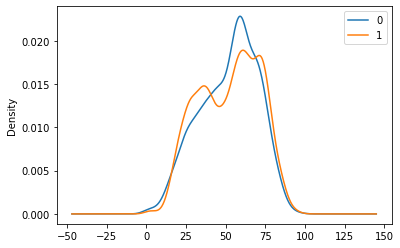

In [101]:
import matplotlib.pyplot as plt
import numpy as np
df1 = df.groupby('sex', as_index=False)
df1['age'].plot(kind='density', legend=True) # or pd.Series()
#Visualize age based on SEX

<AxesSubplot:ylabel='Frequency'>

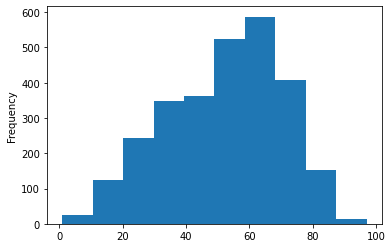

In [102]:
df['age'][df['sex']==0].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

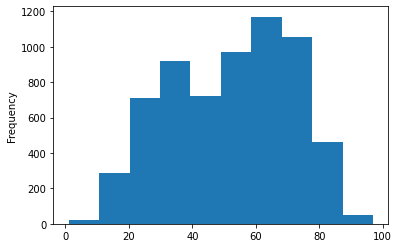

In [103]:
df['age'][df['sex']==1].plot(kind='hist')

In [104]:
df.groupby('sex', as_index=False).age.mean()
#men 0
#women 1

,sex,age
0,0,52.038351
1,1,52.126529


In [105]:
#16

At this point, I should separate the feature set from the target values. The feature set of this data frame includes all the features except the column 'y'. Set column 'y' as the target column of this data frame. 

In [106]:
X= df.drop('y', axis=1)
y= df['y']

The next step is to scale the feature set.I will use MinMaxScaler. Make a data frame out of the scaled data frame with the same column names as the original feature set.

In [107]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data 
scaled = scaler.fit_transform(X)

In [108]:
X= pd.DataFrame(scaled,  columns= X.columns)

In [109]:
X

,age,sex,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,...,FTI measured,FTI,TBG measured,TBG,STMW,SVHC,SVHD,SVI,WEST,other
0,0.291667,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.000000,1.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0
1,0.291667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.000000,1.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0
2,0.416667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.000000,0.0,0.055,0.0,0.0,0.0,0.0,0.0,1.0
3,0.364583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.000000,0.0,0.130,0.0,0.0,0.0,0.0,0.0,1.0
4,0.322917,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.000000,0.0,0.180,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,0.572917,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.087401,1.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0
9164,0.218750,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.112372,1.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0
9165,0.708333,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.101022,1.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0
9166,0.479167,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.099886,1.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
X['age'].mean()
#mean of age in X

0.5322884853112274

### Agglomerative Clustering

Which of the following values of distance_threshold results in 4 clusters in an AgglomerativeClustering. Consider default values for all the other parameters. Note that you should train the clustering model on the scaled feature set.

In [111]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(distance_threshold=50, n_clusters=None)
hc_model.fit(X)

AgglomerativeClustering(distance_threshold=50, n_clusters=None)

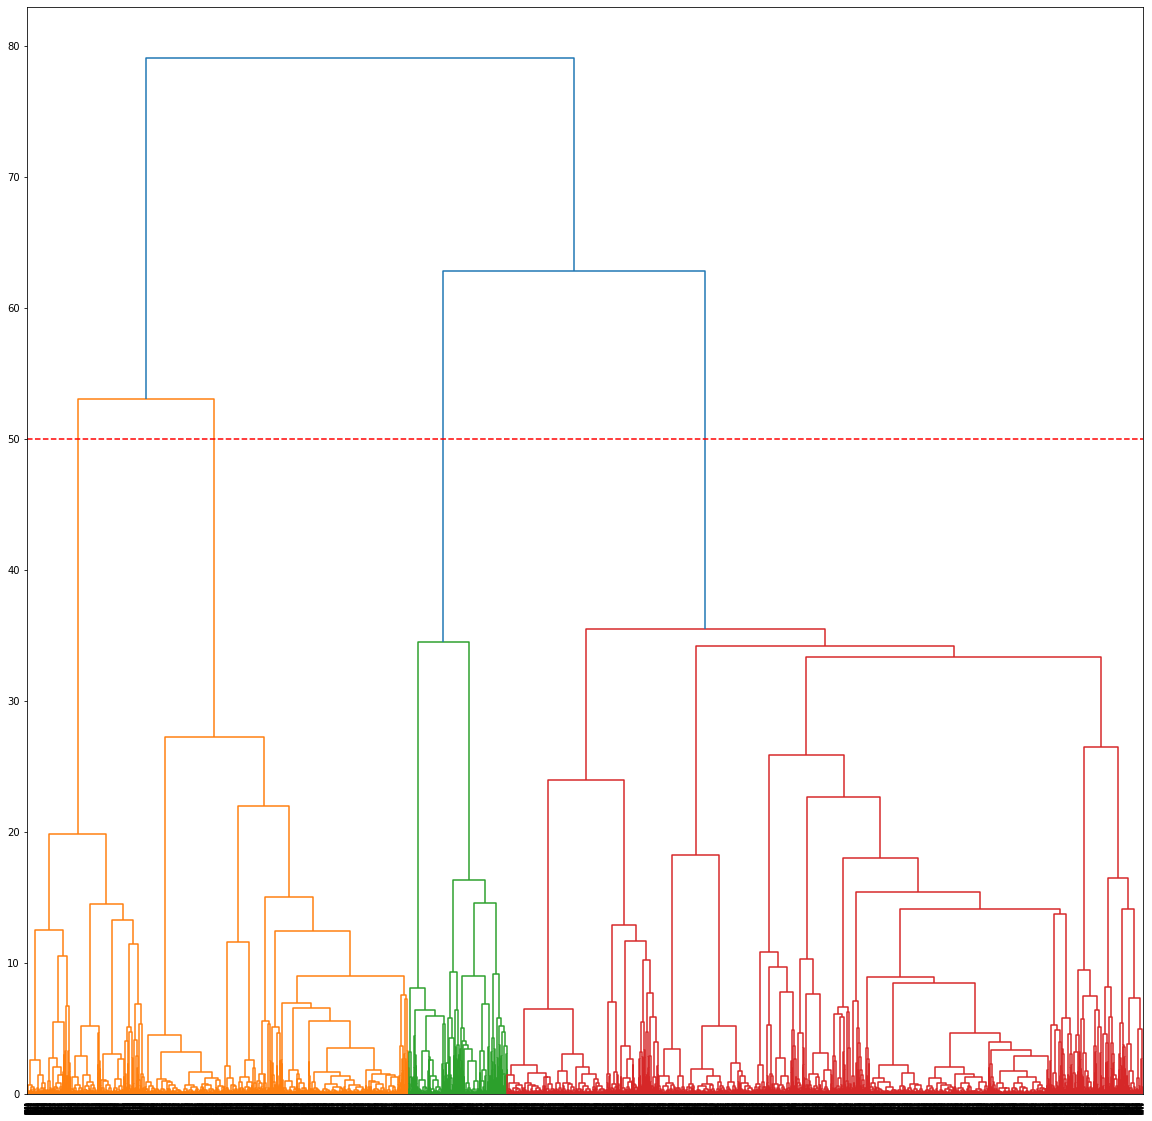

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.subplots(figsize = (20,20))
dendrogram(linkage(X, method = 'ward'))
plt.axhline(y = 50, c = 'r', linestyle = '--')

plt.show()

In [113]:
from collections import Counter
print(Counter(hc_model.labels_))
#Number of data in each cluster

Counter({0: 5220, 1: 2171, 3: 969, 2: 808})


In [114]:
X[hc_model.labels_==0]
#check values in cluster 0

,age,sex,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,...,FTI measured,FTI,TBG measured,TBG,STMW,SVHC,SVHD,SVI,WEST,other
18,0.645833,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.053348,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.364583,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.096481,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,0.406250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.095346,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,0.406250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.108967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,0.406250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.119183,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9158,0.364583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.076050,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9160,0.406250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.096481,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9161,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.130533,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9166,0.479167,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.099886,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Consider the AgglomerativeClustering with the distance_threshold that results in 4 clusters. What is the average age among the instances in the largest cluster?

Mean of age in each cluster

In [115]:
X[hc_model.labels_==0].age.mean()

0.5134798052362708

In [116]:
X[hc_model.labels_==1].age.mean()
#Second is largest avarege

0.623709312144941

In [117]:
X[hc_model.labels_==2].age.mean()

0.4775293935643564

In [118]:
X[hc_model.labels_==3].age.mean()

0.47444745442036457

### Kmeans Clustring

In [119]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 4, random_state = 0)

# Train the model
model = model.fit(X)

In [120]:
print(Counter(model.labels_))
#Number of columns

Counter({1: 5054, 2: 2387, 0: 1273, 3: 454})


In [121]:
pd.DataFrame(model.labels_).value_counts()
#Check values in each cluster

1    5054
2    2387
0    1273
3     454
dtype: int64

In [122]:
X[model.labels_==3].size
#Check size of cluster 3

14074

we see one of the KMeans clusters has less than 5 percent of all records. This may raise the question that if the number of clusters = 4 is a good choice. Fortunately, there is an effective technique that helps us to choose the best number of clusters. For this purpose, we use a function called silhouette_score. 

In [124]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
    model_10 = KMeans(n_clusters= i, random_state = 0)

    # Train the model
    model_10 = model_10.fit_predict(X)
    score = silhouette_score(X, model_10)
#Print silhouette_score of each cluster to see which one is the best cluster K
    print("The cluster ",i,"\t has the score", score)
# 9 is best one

The cluster  2 	 has the score 0.2719937247094641
The cluster  3 	 has the score 0.2991463147556667
The cluster  4 	 has the score 0.34683837538057266
The cluster  5 	 has the score 0.32995784326097727
The cluster  6 	 has the score 0.33900475609900704
The cluster  7 	 has the score 0.3450571311125254
The cluster  8 	 has the score 0.37280991558631926
The cluster  9 	 has the score 0.37699681182874883
